**ML B-13**

**Curb Detection in Autonomous Vehicles**

The below code mounts the google drive from where the training images are used

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The code below basically works in the flow as follows -

* import libraries
*   function to load images
*   Define model
* function to process images
* splitting of dataset in training testing set
* compiling the model
* run the epochs
* ask user to enter test image
* plot graphs and dsiplay output



The architecture of the CNN model is as follows -


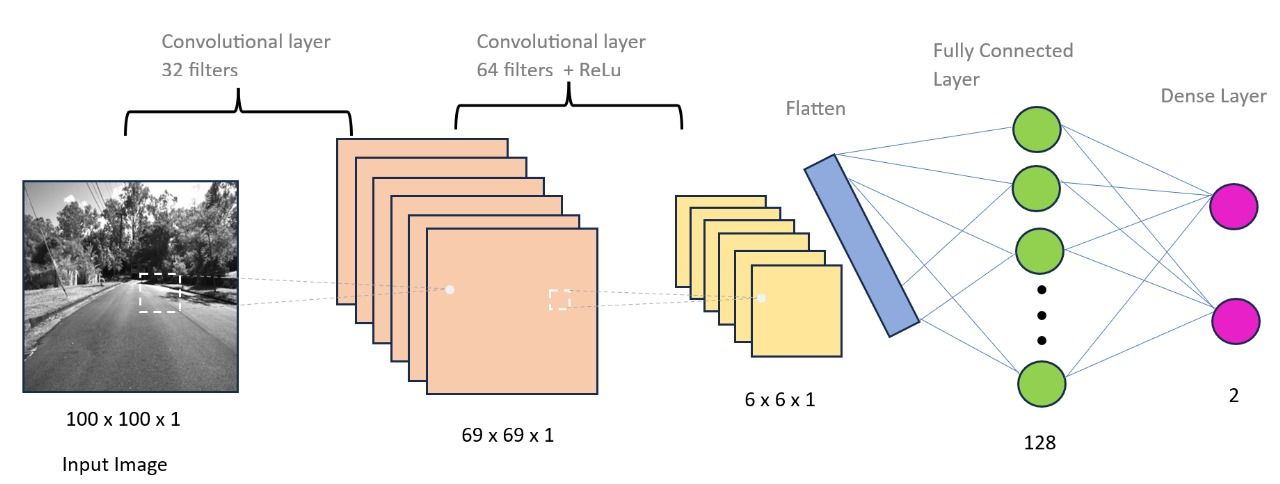

Epoch 1/75
2/2 [==============================] - 6s 2s/step - loss: 48.2927 - accuracy: 0.5000 - val_loss: 95.0101 - val_accuracy: 0.0000e+00
Epoch 2/75
2/2 [==============================] - 4s 2s/step - loss: 94.1592 - accuracy: 0.0000e+00 - val_loss: 91.5329 - val_accuracy: 0.0000e+00
Epoch 3/75
2/2 [==============================] - 4s 2s/step - loss: 90.6322 - accuracy: 0.0000e+00 - val_loss: 87.9269 - val_accuracy: 0.0000e+00
Epoch 4/75
2/2 [==============================] - 5s 2s/step - loss: 87.0293 - accuracy: 0.0000e+00 - val_loss: 84.3541 - val_accuracy: 0.0000e+00
Epoch 5/75
2/2 [==============================] - 4s 2s/step - loss: 83.4765 - accuracy: 0.0000e+00 - val_loss: 80.8693 - val_accuracy: 0.0000e+00
Epoch 6/75
2/2 [==============================] - 7s 4s/step - loss: 80.0184 - accuracy: 0.0000e+00 - val_loss: 77.4951 - val_accuracy: 0.0000e+00
Epoch 7/75
2/2 [==============================] - 5s 2s/step - loss: 76.6738 - accuracy: 0.0000e+00 - val_loss: 74.2400 - 

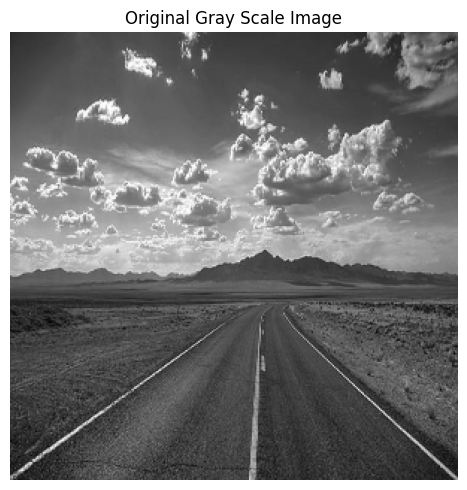

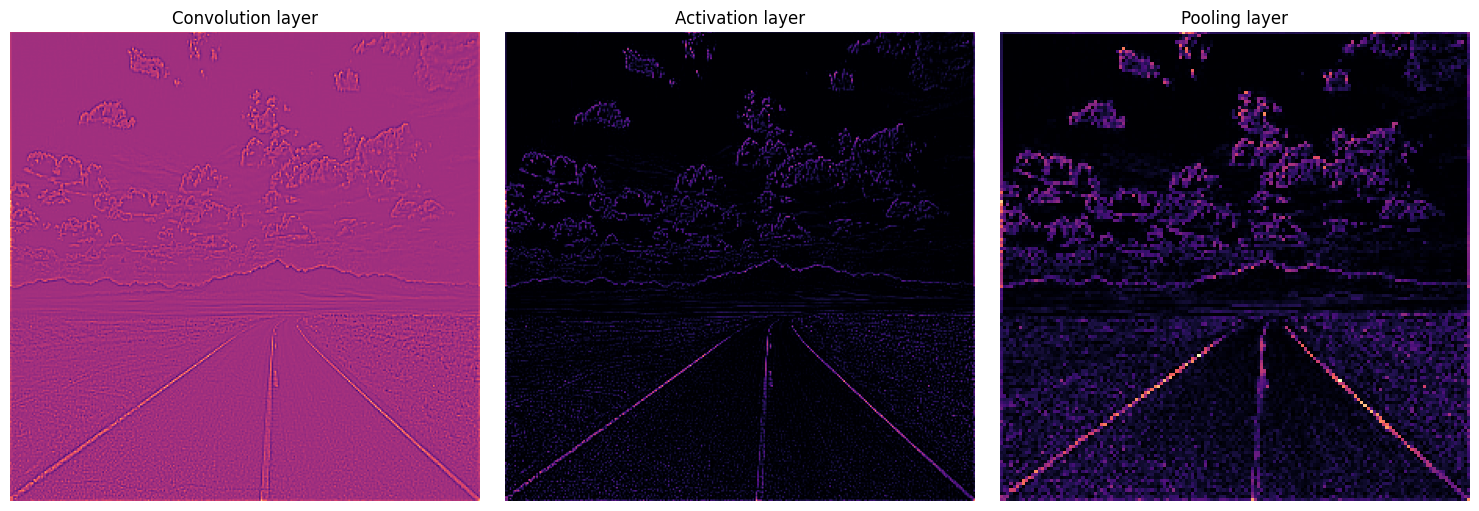

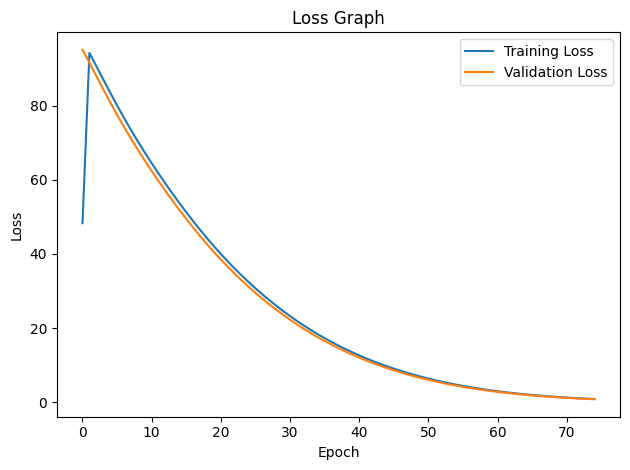

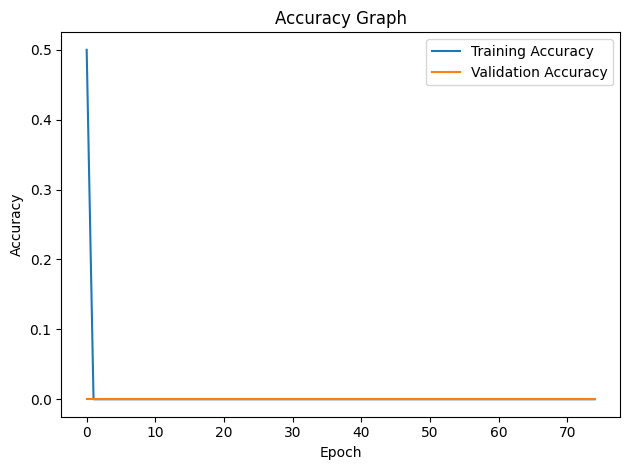

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt

# Load images
def load_images(folder_path):
    images = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            images.append(image)

    return np.array(images)

# Define a simple CNN model
def create_model(input_shape, activation='relu'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activation, input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(2))  # Output layer with 2 neurons for slope and intercept
    return model

def load_images(folder_path, target_size=(100, 100)):
    images = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, target_size)  # Resize the image
            images.append(image)

    return np.array(images)


# Load and preprocess data
folder_path = '/content/drive/MyDrive/S'  # Adjust this path
images = load_images(folder_path)

# Preprocess images (resize, normalize, convert to grayscale)
processed_images = []
for image in images:
    resized_image = cv2.resize(image, (100, 100))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    normalized_image = gray_image / 255.0  # Normalize pixel values
    processed_images.append(normalized_image.reshape(100, 100, 1))  # Add channel dimension

processed_images = np.array(processed_images)

# Dummy labels (since we don't have annotations)
dummy_labels = np.zeros((len(processed_images), 2))  # Assuming 2 output neurons for slope and intercept

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_images, dummy_labels, test_size=0.2, random_state=42)

# Create and compile the model with 'tanh' activation function
input_shape = (100, 100, 1)  # Input shape of preprocessed images
model = create_model(input_shape, activation='tanh')
model.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])  # Mean squared error loss for regression task

# Train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=75, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
accuracy_percentage = accuracy * 100
print("Test Loss:", loss)
print("Test Accuracy: {:.2f}%".format(accuracy_percentage))

# Load and preprocess the image
def load_and_preprocess_image():
    # Ask user for the image file path
    image_path = input("Enter the path to the image file: ")

    # Read the image from the file
    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=1)

    # Resize the image to a fixed size
    image = tf.image.resize(image, size=[300, 300])

    return image

# Set the parameters
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])

# Load and preprocess the image
image = load_and_preprocess_image()

# Plot the original image
plt.figure(figsize=(5, 5))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale Image')
plt.show()

# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(input=image,
                       filters=kernel,
                       strides=1,
                       padding='SAME')

# Plot the convolved image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution layer')

# Activation layer
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation layer')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                      window_shape=(2, 2),
                      pooling_type='MAX',
                      strides=(2, 2),
                      padding='SAME')

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling layer')
#plt.savefig('/content/drive/MyDrive/pooling_layer.png')
plt.show()

# Plot the loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.savefig('/content/drive/MyDrive/loss_graph.png')
plt.legend()
plt.title('Loss Graph')
plt.show()

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.savefig('/content/drive/MyDrive/accuracy_graph.png')
plt.legend()
plt.title('Accuracy Graph')
plt.show()


# Save the model in native Keras format
#model.save('lane_detection_model.keras')


**Convolutional Layer** - the convolutional layer converts the image into numerical values, allowing the neural network to interpret and extract relevant patterns. Its main function is feature extraction i.e., reduce the dimension of the image making it easier for calculation preserving its features.

**ReLU Activation Function** - if any input is negative, ReLU converts it to zero and doesn't allow the neuron to get activated. This means that only a few neurons are activated, making the network easy for computation.
Basically, it introduces the non-linearity into the networks of neural networks so that the networks can learn the relationship between the input and output values.
[Currently this is the best activation function in comparison to Sigmoid and tanh as this completely rules out vanishing gradient problem.]

**Flatten** - Flattening is used to convert all the resultant 2-Dimensional arrays from feature maps into a single long continuous linear vector.

**Dense Layer** - This is also known as fully Connected Layer. A dense layer refers to a type of layer where each neuron is connected to every neuron in the preceding layer.Dense Layer is used to classify image based on output from convolutional layers.

**SVM**

A support vector machine (SVM) is a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs.

Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
Specificity: 1.0
Confusion Matrix:
 [[ 5  0]
 [ 0 11]]


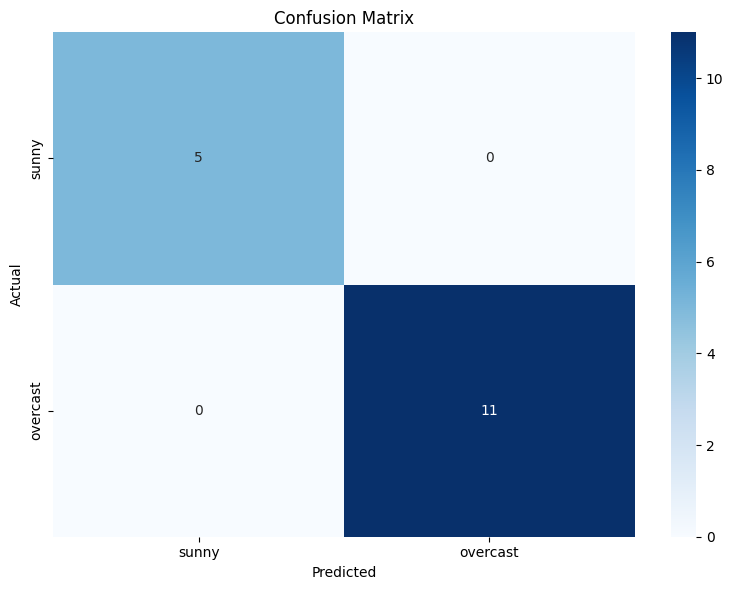

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Load data
image_paths = []
labels = []

for label in ["sunny", "overcast"]:
    folder_path = os.path.join("/content/drive/MyDrive/CURB", label)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image_paths.append(image_path)
        labels.append(label)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Feature extraction using HOG
def extract_features(image_path):
    image = imread(image_path, as_gray=True)
    return hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L2")

X_train_features = [extract_features(path) for path in X_train]
X_test_features = [extract_features(path) for path in X_test]

# Train Random Forest model
Rmodel = RandomForestClassifier(n_estimators=100)
Rmodel.fit(X_train_features, y_train)

# Evaluate model
y_pred = Rmodel.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate True Positives, False Positives, True Negatives, False Negatives
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Calculate Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate Specificity
specificity = TN / (TN + FP)

# Print the metrics
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["sunny", "overcast"], yticklabels=["sunny", "overcast"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Hough Transform**

The Hough transform is a popular feature extraction technique that converts an image from Cartesian to polar coordinates. Any point within the image space is represented by a sinusoidal curve in the Hough space.

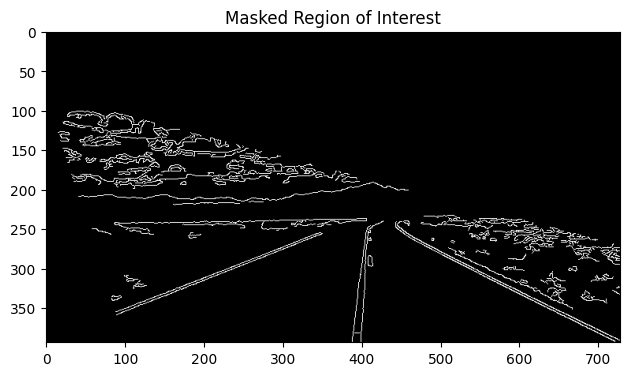

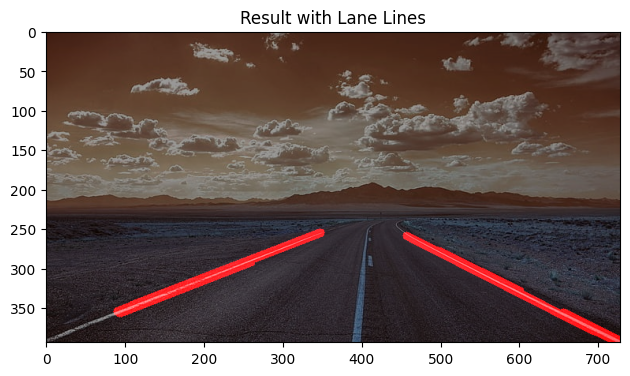

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(100, height), (1200, height), (0, 80)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])

image = cv2.imread('test2.jpg')
p = np.copy(image)
canny_result = canny(p)

# Display the original image with region of interest
plt.imshow(image)
plt.title('Original Image with Region of Interest')
#plt.show()

# Display the Canny result with region of interest
plt.imshow(canny_result, cmap='gray')
plt.title('Canny Result with Region of Interest')
#plt.show()

# Display the masked region of interest
masked_image = region_of_interest(canny_result)
plt.imshow(masked_image, cmap='gray')
plt.title('Masked Region of Interest')
plt.show()

lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 150, np.array([]), minLineLength=55, maxLineGap=4)

# Use lines instead of averaged_lines
line_image = display_lines(image, lines)

combo_image = cv2.addWeighted(image, 0.6, line_image, 1, 1)
plt.imshow(combo_image)
plt.title('Result with Lane Lines')
plt.show()



cv2.waitKey(0)
cv2.destroyAllWindows()
